In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
data = pd.read_csv('test files\detected_results.csv')

In [3]:
def tupleCoords(x,y):
    return (int(x),int(y))

data['tuple_coords'] = data[['centroid_x','centroid_y']].apply(lambda x:tupleCoords(*x),axis=1)

In [4]:
def maskBorder(image,x,y):
    '''input x,y coordinates and return mask boundary with x,y centroid'''
    
    min_coord = 0
    max_coord = 2844
    
    border_dimension = 30
    border_width = 5
    
    def borderLimits(coord):
        '''return matrix slice values for square boundary for centroid coordinates'''
        if coord - border_dimension < min_coord:
            lower_lim = min_coord
        else:
            lower_lim = coord - border_dimension
            
        if coord + border_dimension > max_coord:
            upper_lim = max_coord
        else:
            upper_lim = coord + border_dimension
            
        return lower_lim, upper_lim
    
    x_lower_lim,x_upper_lim = borderLimits(x)
    y_lower_lim,y_upper_lim = borderLimits(y)
    
    def borderPad():
        '''pad slice values with white border in RGB channels'''
        inner_slice = image[x_lower_lim + border_width:x_upper_lim - border_width,y_lower_lim + border_width:y_upper_lim - border_width,:]
    
        r_pad = np.pad(inner_slice[:,:,0], pad_width=border_width, mode='constant', constant_values=255)
        g_pad = np.pad(inner_slice[:,:,1], pad_width=border_width, mode='constant', constant_values=255)
        b_pad = np.pad(inner_slice[:,:,2], pad_width=border_width, mode='constant', constant_values=255)
    
        rgb_border = np.dstack((r_pad,g_pad,b_pad))
            
        return rgb_border
    
    border_slice = borderPad()

    image[x_lower_lim:x_upper_lim,y_lower_lim:y_upper_lim] = border_slice
    
    return image

100%|██████████████████████████████████████████████████████████████████████████████| 247/247 [00:00<00:00, 3302.14it/s]


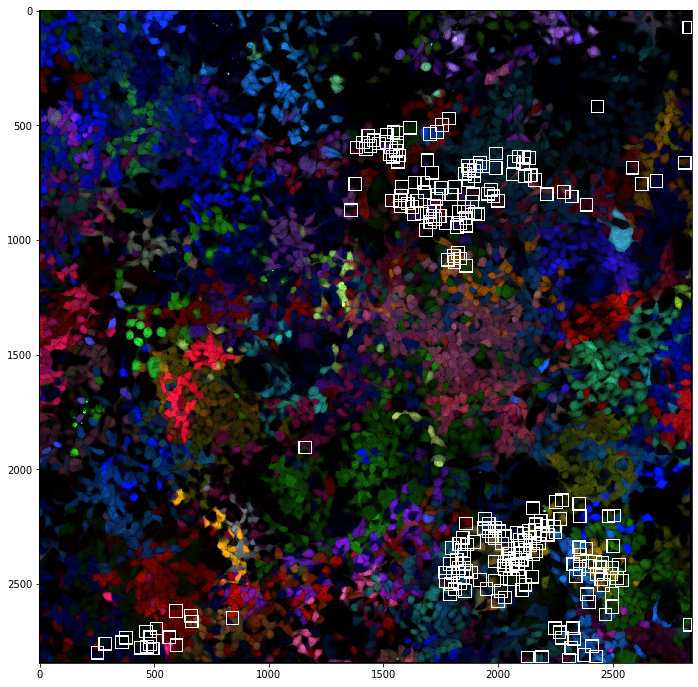

In [5]:
#read image and iterate through bool filtered cells values
#update sliced values in new image and return 
#show masked image

image = np.array(Image.open('test files\detected_image.jpg'))

for i in tqdm(data[(data['ratio_green']>0.4) & (data['ratio_red']>0.4)]['tuple_coords']):
    new_image = maskBorder(image,i[0],i[1])
    
plt.figure(figsize=(12,12))
plt.imshow(new_image)